In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('BTC-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

In [5]:
data = data[["Date", "Close"]]
print(data.head())

        Date         Close
0 2022-03-30  47062.664062
1 2022-03-31  45538.675781
2 2022-04-01  46281.644531
3 2022-04-02  45868.949219
4 2022-04-03  46453.566406


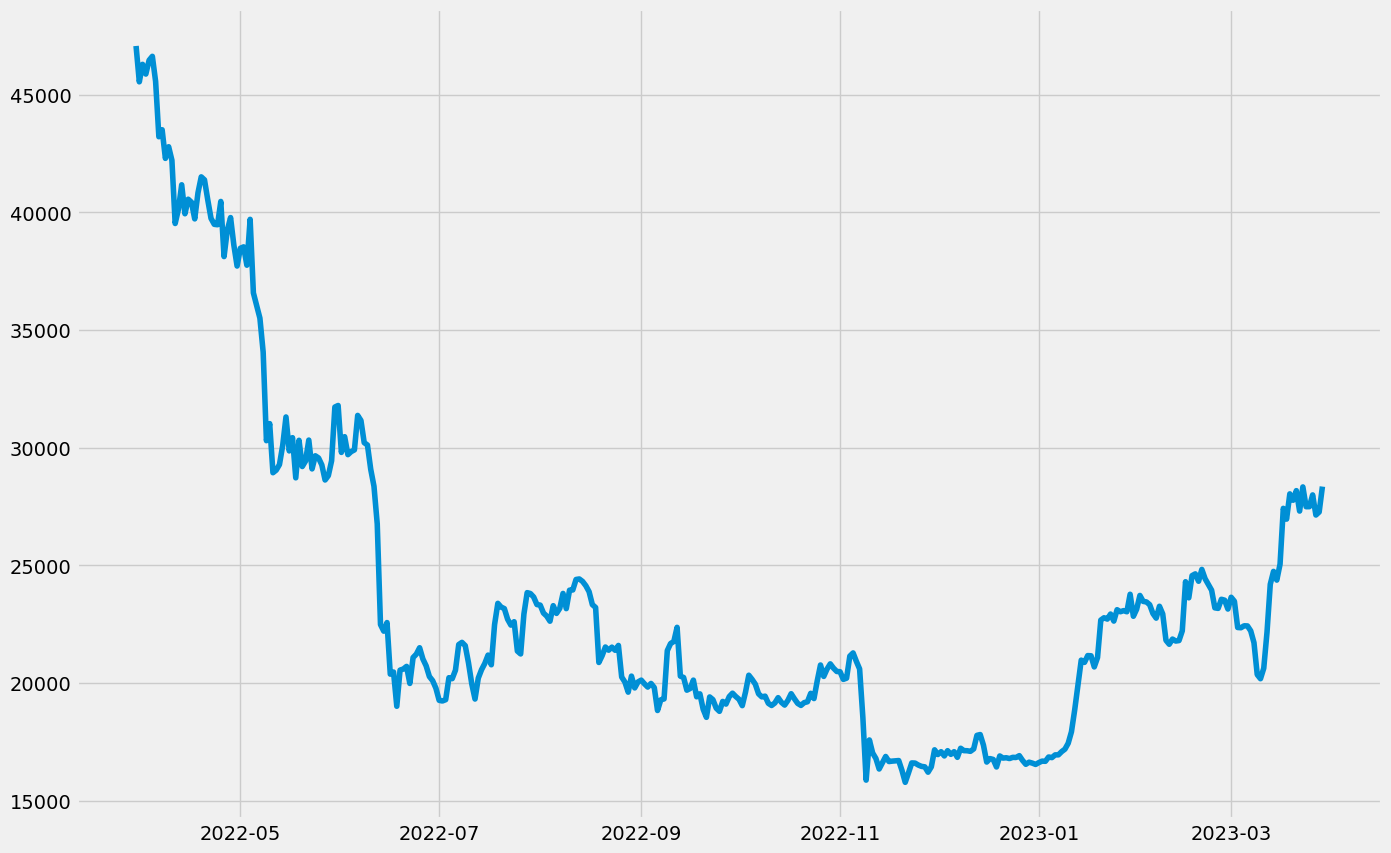

In [25]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])




<Figure size 640x480 with 0 Axes>

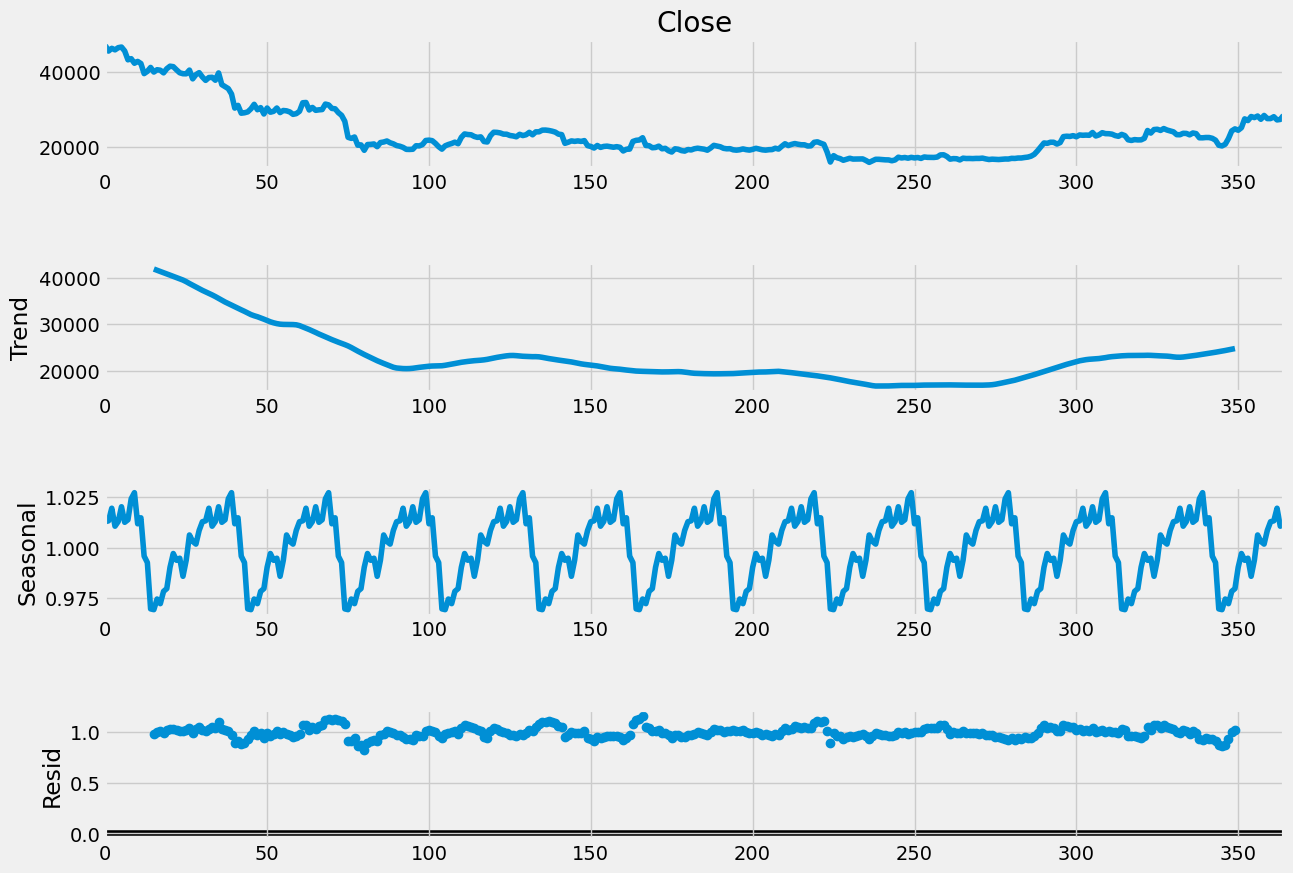

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

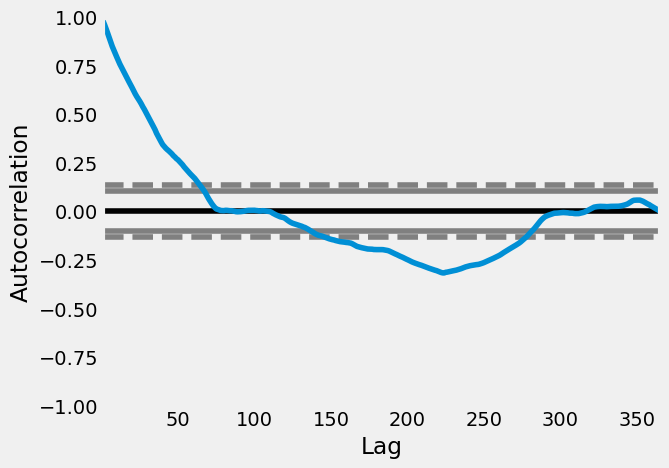

In [8]:
pd.plotting.autocorrelation_plot(data["Close"])

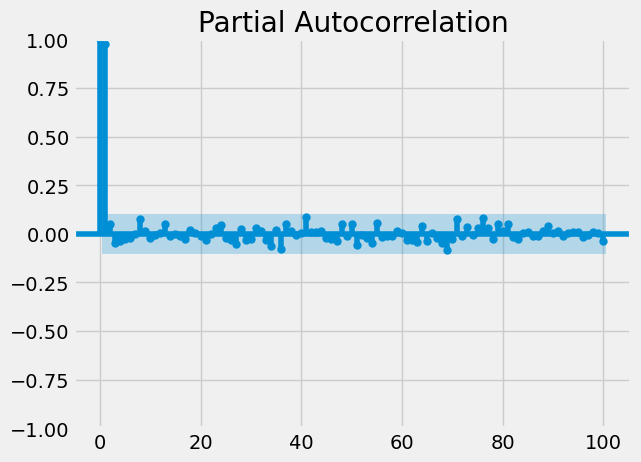

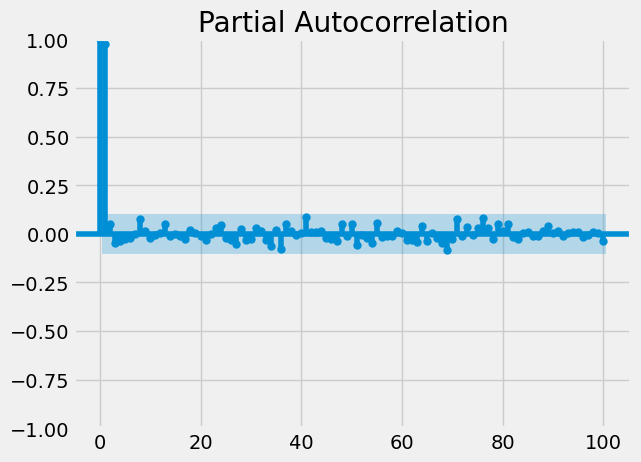

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags=100, method='ywm')


In [18]:





p, d, q = 0, 1, 0
model = ARIMA(data["Close"], order=(p,d,q))
fitted = model.fit()
print(fitted.summary())



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  365
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2954.240
Date:                Thu, 30 Mar 2023   AIC                           5910.479
Time:                        23:30:52   BIC                           5914.377
Sample:                             0   HQIC                          5912.028
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.544e+05   2.66e+04     24.629      0.000    6.02e+05    7.06e+05
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):               350.68
Prob(Q):                              0.50   Pr

In [28]:
predictions = fitted.predict()
print(predictions)

0          0.000000
1      47062.664062
2      45538.675781
3      46281.644531
4      45868.949219
           ...     
360    27493.285156
361    27494.707031
362    27994.330078
363    27139.888672
364    27268.130859
Name: predicted_mean, Length: 365, dtype: float64


In [29]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.11997D+00    |proj g|=  3.30527D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   1.038D-06   8.120D+00
  F =   8.1196541152761768     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  365
Model:      

 This problem is unconstrained.


In [ ]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

<AxesSubplot:>

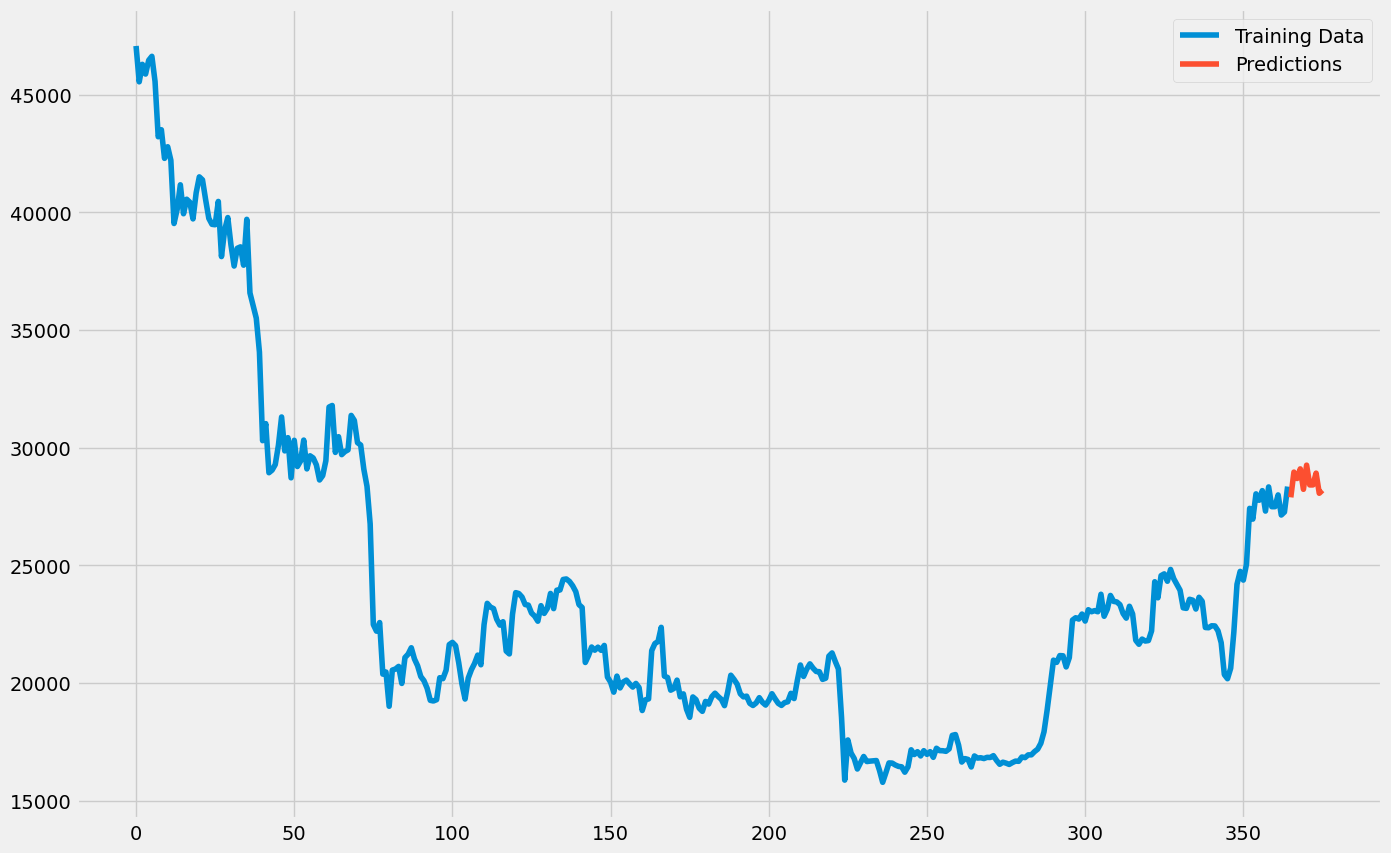

In [31]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")